### AgroParisTech -- Analyse des systèmes dynamiques
# Formation, destruction et restauration de la couche d'ozone
Ce document présente le mécanisme de formation de l'ozone stratosphérique, sa perturbation par les chlorofluorocarbures et la relaxation vers l'état initial lorsque la perturbation cesse. Le traitement numérique du modèle est proposé en Python 3 dans l'écosystème Scipy, les paquets nécessaires étant :

- Scipy library avec integrate ;
- Numpy ;
- Matplotlib.

## Introduction

Depuis les travaux de Fabry et Buisson (1913), puis de Dobson (1920), la présence d'ozone dans la stratosphère, entre 10 et 50 km d'altitude est bien établie. En 1934, les mesures de Götz montrèrent que la concentration atmosphérique est maximale aux alentours de 25 km. L'ozone absorbe la lumière ultraviolette, en particulier autour de 320 nm. Il participe ainsi à l'absorption du rayonnement solaire dans une gamme de longueurs d'onde qui n'est pas absorbée par les autres constituants de l'atmosphère. La couche d'ozone stratosphérique est donc nécessaire au maintien de la vie sur Terre : en effet, les ultraviolets ont une action délétère sur de nombreuses molécules organiques. Des épisodes d'amincissement de la couche d'ozone furent observés dès les années 1960. En 1985, Farman expliqua l'ampleur que prenait ce phénomène par la présence de composés chlorés dans l'atmosphère. Cette hypothèse fut rapidement confirmée ; l'enjeu était tel pour la survie à la surface du globe que fut signé en 1987 le protocole de Montréal qui vise à la protection de la couche d'ozone.
Ce TD  envisage le fonctionnement de la stratosphère comme un système dynamique. Dans un premier temps, le fonctionnement en régime stationnaire est recherché : il conduit à la teneur normale en ozone. Dans un deuxième temps, le modèle sera modifié pour tenir compte de la présence des composés du chlore introduits dans l'atmosphère par l'activité humaine depuis la première moitié du XX<sup>ème</sup> siècle. Enfin, nous examinerons l'effet du protocole de Montréal, c'est-à-dire de la forte diminution de la production d'un certain nombre de produits organiques chlorés : le système dynamique « stratosphère » relaxe vers sa composition d'équilibre.
    
## La stratosphère n'est pas à l'équilibre thermodynamique

La présence d'ozone dans la stratosphère ne peut pas s'expliquer par un équilibre chimique entre le dioxygène et l'ozone qui serait :
$\require{mhchem}$
	\begin{align*}
		&\ce{3 O2 <=> 2 O3}	&K(T)
	\end{align*}
 En effet, à l'altitude du maximal de concentration en ozone, soit 22,5 km au-dessus du niveau de la mer, règne une température de 214 K, de sorte que la constante thermodynamique de l'équilibre y est égale à K(214)= 1,2  10<sup>-77</sup>. La pression de dioxygène, soit le cinquième de la pression atomsphérique, valant 700 Pa, il est aisée d'évaluer la pression d'équilibre d'ozone à : 2,5 10<sup>37</sup> Pa. Cette valeur, (dont les chiffres sont sans signification physique !) est très éloignée de l'observation ; depuis les travaux de Götz, on sait que cette pression est proche de 25 mPa (la teneur en ozone est maintenant mesurée par des ballons sonde ou par des sytèmes spectroscopiques). En réalité, la stratosphère n'est pas un système isolé à l'équilibre thermodynamique. Elle est le siège de nombreuses réactions dont plusieurs requièrent de l'énergie fournie par le rayonnement solaire.
### Rappel : le modèle de Chapman

En fait, la teneur en ozone dans la stratosphère résulte du bilan de sa formation et de sa destruction par diverses réactions ; ce bilan peut aboutir à un état stationnaire de concentration, la stationnarité n'étant pas pour autant une situation d'équilibre thermodynamique. [Chapman a proposé en 1930 "A Theory of Upper-Atmospheric Ozone"](https://www.rmets.org/sites/default/files/chapman-memoirs.pdf "Sydney Chapman, astronome et géophysicien britannique, 29 janvier 1888, Eccles - 19 juin 1970, Boulder, Colorado. A travaillé principalement sur la dynamique des gaz, le magnétisme terrestre et interplanétaire, et l'ionosphère.") le premier modèle satisfaisant pour décrire ce système :
	\begin{align*}
		&\ce{O2 + hν -> 2 O}		&	& (1) \qquad  k_1   \text{ en }  s^{-1}\\
		&\ce{O + O2 + M -> O3 + M}	&	& (2) \qquad  k_2 \text{ en }  cm^6 \, molecule^{-2} \, s^{-1}  \\
		&\ce{O3 + hν -> O + O2}		&	& (3) \qquad  k_3 \text{ en }  s^{-1}\\
		&\ce{O + O3  -> 2 O2}		&	& (4) \qquad  k_4 \text{ en }  cm^3 \, molecule^{-1} \, s^{-1}  
	\end{align*}
À l'acte (1), les molécules de dioxygène sont dissociées sous l'effet d'un rayonnement ultraviolet « dur », vers 180&#8239;nm. La constante cinétique $k_1$ est proportionnelle à l'intensité lumineuse dans cette région du spectre lumineux ; elle reste aussi dépendante de la température selon le loi d'Arrhénius. L'acte (2) forme l'ozone : le rapprochement d'un atome d'oxygène et d'une molécule de dioxygène conduit à une entité d'énergie interne élevée et instable. Lorsqu'une tierce molécule $\ce{M}$ quelconque ($\ce{N2}$, $\ce{O2}$, $\ce{Ar}$, etc.) peut recevoir une partie de  cette énergie interne, la formation d'ozone est possible. L'acte (2) présente donc une molécularité égale à 3. La constante $k_2$ suit la loi d'Arrhénius ; il faut remarquer l'usage de la chimie de l'atmosphère d'expliciter les concentrations en molécules par centimètre cube et non en moles par mètre cube. À l'acte (3), les molécules d'ozone reçoivent du rayonnement solaire vers 320&#8239;nm une énergie suffisante pour provoquer leur dissociation ; il faut noter que c'est ce phénomène qui explique l'absorption de cette gamme d'ultraviolets par la stratosphère et qui confère à cette couche son rôle protecteur. $k_3$ dépend de l'intensité lumineuse autour de 320&#8239;nm et de la température. À l'acte (4), l'ozone se dissocie sous l'effet du choc avec l'oxygène atomique ; $k_4$ suit la loi d'Arrhénius.
Les concentrations d'ozone et d'oxygène atomique restent très faibles et on peut [appliquer](http://chimie.agroparistech.fr/chimie1a/solution_Chapman.html "lien vers la résolution détaillée ; ouvre une nouvelle fenêtre (pas de Retour)") l'approximation des états quasi stationnaires pour obtenir :

\begin{align*}
		\ce{[O3]} = \ce{[O2]} \sqrt{\frac{k_1 k_2 \ce{[M]}}{k_3 k_4}}
\end{align*}

## Étude du régime stationnaire en cinétique chimique classique
En utilisant les données des fichiers **atmosphere.txt**, **constantes_photo.txt** et **arrhenius.txt**, établir le point d'équilibre pour le système «&#8239;atmosphère&#8239;» en fonction de l'altitude : on ne s'intéressera qu'à la variable «&#8239;concentration en ozone&#8239;» qui pourra être convertie en pression partielle grâce à la loi des gaz parfaits. Les colonnes dans le fichier **atmosphère.txt** sont :
- z : altitude
- T : température
- N2 : $\ce{[N2]}$
- O2 : $\ce{[O2]}$  
- Ar : $\ce{[Ar]}$ 
- HO2 : $\ce{[HO2]}$ 
- HO : $\ce{[HO]}$ 
- NO2 : $\ce{[NO2]}$
- NO : $\ce{[NO]}$
- ClO : $\ce{[ClO]}$
- Cl : $\ce{[Cl]}$
- CFC12 : $\ce{[CF2Cl2]}$

l'altitude est en km, le température en K et les concentrations en molecules&#8239;cm<sup>-3</sup>.
Ce fichier comporte un ligne d'en-tête qui donne le titre des colonnes ; son contenu est facilement lu et copié dans un tableau **atm_data** par la commande :


In [1]:
# -*- coding: utf-8 -*-
# quelques chargements qui serviront dans la suite
from scipy.optimize import fsolve  # le « solveur » Newton dans Python
import numpy as np
import matplotlib.pyplot as plt
import sys


In [2]:
atm_data = np.loadtxt("atmosphere.txt", delimiter = " ", skiprows = 1)

De le même manière, on récupère toutes les constantes cinétiques qui dépendent de l'altitude, en fait du rayonnement solaire, de moins en moins intense quand on s'approche du sol. La liste des colonnes de ce fichier est dans **codes_reactions_photo.txt**

In [3]:
cst_data= np.loadtxt("constantes_photo.txt", skiprows=1, delimiter=" ", dtype=float) # tout le fichier est mis dans un tableau numpy
# colonnes intéressantes :
    # 1 :  O2 -> O + O
    # 2 O3 -> O2 + O(1D)
    # 3 O3 -> O2 + O(3P)
    # 83 CCl2F2 (CFC-12) -> Products
  

Pour les constantes qui ne correspondant pas à de photolyse, il faudra faire appel à des lois de variation de la constante cinétique avec la température **atm_data[,1]**. Il s'agit d'Arrhénius pour $k_4$ et d'une forme spéciale pour $k_2$ qui correspond à une acte termoléculaire. $k_3$ est la somme de deux valeurs car il y a en fait deux réactions suivant qu'on produit de l'oxygène atomique triplet ou singulet. 
$\ce{[O3]}$ est calculée pour toutes les altitudes et le résultat est rangé dans **profil_O3**

In [4]:
kB=1.380649e-23 # contante de Boltzmann
profil_O3=[]
i=0
for altitude in atm_data[:,0] :
    T = atm_data[i,1]
    M = atm_data[i,2] + atm_data[i,3] + atm_data[i,4]
    k1 = cst_data[i,1]  # constante apparente de l'acte 1 : dégénérée par rapport à O2 qui est constant
    k2 = 6.0e-34*np.power(T/300.0,-2.4) # formule spéciale termoleculaire
    k3 = cst_data[i,2] + cst_data[i,3]
    k4 = 8.0e-12*np.exp(-2060/T) # Arrhenius classique
    pO3=T*atm_data[i,3]*np.sqrt(k1*k2*M/k3/k4)*1.0e6*kB # pression (loi des gaz parfaits moléculaire donc kR et pas R ;le facteur 1.0e6 rend compte des centimètres cube !)
    profil_O3.append(pO3) #stockage du profil de pression
    i+=1

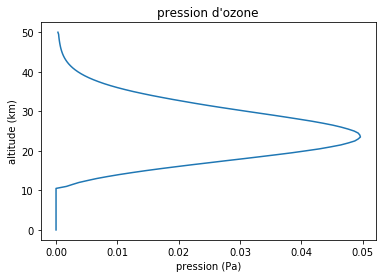

In [12]:
plt.plot(profil_O3,atm_data[:,0])
plt.title('pression d\'ozone')
plt.xlabel('pression (Pa)')
plt.ylabel('altitude (km)')
plt.show()

In [13]:
import plotly.graph_objects as go
trace = go.Scatter(
    x = profil_O3,
    y = atm_data[:,0],
   )
data = [trace]


layout = go.Layout(
        title=go.layout.Title(text="Profil d'ozone"),
        xaxis_title="pression d'ozone (Pa)",
        yaxis_title="altitude (km)",
    )


fig = go.Figure(data, layout)


## Yapuka : ASD si on introduit des substances (CFC) qui provoquent la destruction de l'ozone

In [14]:
fig.show()